# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [5]:

# student details 1: Roei G. 5171
# student details 2: Daniel S. 1489
# student details 3: Rom Z. 0752
# student details 4: Alon A. 6315

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: claude
Goal: find the 6 best attributes for a correlation map
Propmpt1: what are the best attributes for a correlation map in this dataset, dont show with code
    
Propmpt2:
    
Propmpt3: 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
This dataset describes the properties of different wines based on 13 attributes.
We want to be able to classify new wines into 1 of 3 classes.
We will use classification machine learning algorithms in order to help us achieve our goal.
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, f1_score




Matplotlib is building the font cache; this may take a moment.


In [7]:
def import_csv(path):
    return pd.read_csv(path)

In [8]:
train = import_csv("wine_train.csv")
train.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [9]:

test = import_csv("wine_test.csv")
test.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


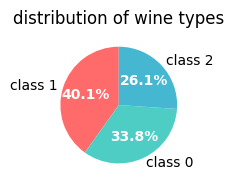

In [10]:
pieplot = plt.subplot(2, 3, 1)
wine_types = train['target'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
labels = [f'class {i}' for i in wine_types.index]
wedges, texts, autotexts = pieplot.pie(wine_types.values, labels=labels, colors=colors, 
                                      autopct='%1.1f%%', startangle=90)
pieplot.set_title('distribution of wine types')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

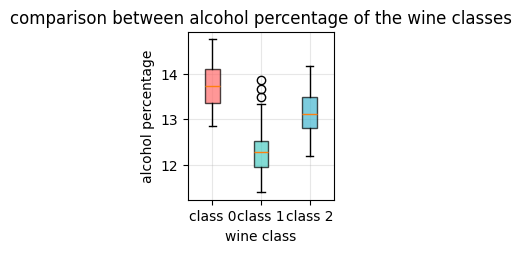

In [11]:
bxplot = plt.subplot(2, 3, 2)
wine_data_by_type = [train[train['target']==i]['alcohol'].values for i in sorted(train['target'].unique())]
bp = bxplot.boxplot(wine_data_by_type, tick_labels=[f'class {i}' for i in sorted(train['target'].unique())],
                  patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
bxplot.set_xlabel('wine class')
bxplot.set_ylabel('alcohol percentage')
bxplot.set_title('comparison between alcohol percentage of the wine classes')
bxplot.grid(True, alpha=0.3)

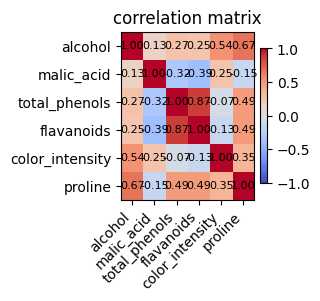

In [12]:
cor_mat = plt.subplot(2, 3, 3)
selected_features = ['alcohol', 'malic_acid', 'total_phenols', 'flavanoids', 'color_intensity', 'proline']
corr_matrix = train[selected_features].corr()
im = cor_mat.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
cor_mat.set_xticks(range(len(selected_features)))
cor_mat.set_yticks(range(len(selected_features)))
cor_mat.set_xticklabels(selected_features, rotation=45, ha='right')
cor_mat.set_yticklabels(selected_features)
cor_mat.set_title('correlation matrix')
for i in range(len(selected_features)):
    for j in range(len(selected_features)):
        text = cor_mat.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=8)
plt.colorbar(im, ax=cor_mat, fraction=0.046, pad=0.04)

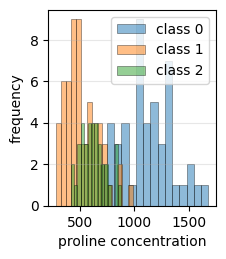

In [13]:
hist = plt.subplot(2, 3, 6)
for wine_type in sorted(train['target'].unique()):
    mask = train['target'] == wine_type
    hist.hist(train[mask]['proline'], bins=15, alpha=0.5, label=f'class {wine_type}', 
            edgecolor='black', linewidth=0.5)
hist.set_xlabel('proline concentration')
hist.set_ylabel('frequency')
hist.legend()
hist.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [16]:
# ===== Part 3: Experiments =====

# ------------------------------------------------------------
# 0) Assume you already have: train, test, X_train, Y_train, X_test, Y_test
#    If not, load your dataset's provided train/test CSVs here.
# ------------------------------------------------------------
X_train = train.drop("target", axis=1)
Y_train = train["target"]
X_test  = test.drop("target", axis=1)
Y_test  = test["target"]

scorer = make_scorer(f1_score, average="macro")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
preprocess = ColumnTransformer(
    transformers=[("num_passthrough", "passthrough", num_cols)],
    remainder="drop",
)

pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("scale", "passthrough"),
    ("pca", "passthrough"),
    ("kbest", "passthrough"),
    ("clf", LogisticRegression())
])

fe_grid = {
    "scale": [StandardScaler(), MinMaxScaler(), "passthrough"],
    "pca": ["passthrough", PCA(n_components=5), PCA(n_components=10)],
    "kbest": ["passthrough", SelectKBest(mutual_info_classif, k=5), SelectKBest(mutual_info_classif, k=10)],
}

def fe_param_blocks():
    blocks = []
    for s in fe_grid["scale"]:
        for p in fe_grid["pca"]:
            for k in fe_grid["kbest"]:
                blocks.append({"scale": [s], "pca": [p], "kbest": [k]})
    return blocks

fe_blocks = fe_param_blocks()
grids = []

for fe in fe_blocks:
    grids.append({
        **fe,
        "clf": [LogisticRegression(random_state=42, max_iter=1000)],
        "clf__C": [0.1, 1, 10],
        "clf__solver": ["lbfgs", "liblinear"],
    })

for fe in fe_blocks:
    grids.append({
        **fe,
        "clf": [SVC(random_state=42)],
        "clf__C": [0.1, 1, 10],
        "clf__kernel": ["rbf", "linear"],
        "clf__gamma": ["scale", "auto"],
    })

for fe in fe_blocks:
    grids.append({
        **fe,
        "clf": [RandomForestClassifier(random_state=42)],
        "clf__n_estimators": [100, 200],
        "clf__max_depth": [None, 10, 20],
        "clf__min_samples_split": [2, 5],
    })

grid = GridSearchCV(
    estimator=pipe,
    param_grid=grids,
    scoring=scorer,
    cv=skf,
    n_jobs=-1,
    verbose=1,
    return_train_score=False,
    refit=True,
)

grid.fit(X_train, Y_train)

res = pd.DataFrame(grid.cv_results_)
keep = [
    "mean_test_score","std_test_score","rank_test_score",
    "param_clf","param_clf__C","param_clf__solver","param_clf__kernel","param_clf__gamma",
    "param_clf__n_estimators","param_clf__max_depth","param_clf__min_samples_split",
    "param_scale","param_pca","param_kbest"
]
keep = [c for c in keep if c in res.columns]
res_tidy = res[keep].sort_values("rank_test_score").reset_index(drop=True)

print("Top 10 permutations by mean CV macro-F1:\n")
display(res_tidy.head(10))

best_params = grid.best_params_
best_score  = grid.best_score_
best_est    = grid.best_estimator_

print("\nBest params:\n", best_params)
print(f"Best CV macro-F1: {best_score:.4f}")


Fitting 5 folds for each of 810 candidates, totalling 4050 fits
Top 10 permutations by mean CV macro-F1:



,mean_test_score,std_test_score,rank_test_score,param_clf,param_clf__C,param_clf__solver,param_clf__kernel,param_clf__gamma,param_clf__n_estimators,param_clf__max_depth,param_clf__min_samples_split,param_scale,param_pca,param_kbest
0,0.986831,0.016210,1,"LogisticRegression(max_iter=1000, random_state...",1.0,lbfgs,NaN,NaN,NaN,NaN,NaN,MinMaxScaler(),PCA(n_components=10),passthrough
1,0.986831,0.016210,1,"LogisticRegression(max_iter=1000, random_state...",1.0,lbfgs,NaN,NaN,NaN,NaN,NaN,MinMaxScaler(),PCA(n_components=10),SelectKBest(score_func=<function mutual_info_c...
2,0.986831,0.016210,1,SVC(random_state=42),1.0,NaN,rbf,auto,NaN,NaN,NaN,MinMaxScaler(),passthrough,passthrough
3,0.986728,0.016319,4,"LogisticRegression(max_iter=1000, random_state...",0.1,lbfgs,NaN,NaN,NaN,NaN,NaN,StandardScaler(),passthrough,SelectKBest(score_func=<function mutual_info_c...
4,0.986728,0.016319,4,"LogisticRegression(max_iter=1000, random_state...",1.0,liblinear,NaN,NaN,NaN,NaN,NaN,StandardScaler(),passthrough,SelectKBest(score_func=<function mutual_info_c...
5,0.985606,0.028788,6,SVC(random_state=42),1.0,NaN,rbf,scale,NaN,NaN,NaN,MinMaxScaler(),PCA(n_components=10),passthrough
6,0.985606,0.028788,6,SVC(random_state=42),1.0,NaN,rbf,scale,NaN,NaN,NaN,MinMaxScaler(),PCA(n_components=10),SelectKBest(score_func=<function mutual_info_c...
7,0.985606,0.028788,6,SVC(random_state=42),1.0,NaN,rbf,scale,NaN,NaN,NaN,MinMaxScaler(),passthrough,passthrough
8,0.980783,0.024841,9,"LogisticRegression(max_iter=1000, random_state...",0.1,liblinear,NaN,NaN,NaN,NaN,NaN,MinMaxScaler(),PCA(n_components=10),SelectKBest(score_func=<function mutual_info_c...
9,0.980783,0.024841,9,"LogisticRegression(max_iter=1000, random_state...",0.1,liblinear,NaN,NaN,NaN,NaN,NaN,MinMaxScaler(),PCA(n_components=10),passthrough



Best params:
 {'clf': LogisticRegression(max_iter=1000, random_state=42), 'clf__C': 1, 'clf__solver': 'lbfgs', 'kbest': 'passthrough', 'pca': PCA(n_components=10), 'scale': MinMaxScaler()}
Best CV macro-F1: 0.9868


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [17]:
# ===== Part 4: Train best model on full train =====

best_est = grid.best_estimator_
best_params = grid.best_params_
best_cv = grid.best_score_

best_est.fit(X_train, Y_train)

print("Best params:", best_params)
print(f"Best CV macro-F1: {best_cv:.4f}")


Best params: {'clf': LogisticRegression(max_iter=1000, random_state=42), 'clf__C': 1, 'clf__solver': 'lbfgs', 'kbest': 'passthrough', 'pca': PCA(n_components=10), 'scale': MinMaxScaler()}
Best CV macro-F1: 0.9868


## Part 5 - Apply on test and show model performance estimation

Macro-F1 (test): 0.9732
Accuracy (test): 0.9722

              precision    recall  f1-score   support

           0     0.9167    1.0000    0.9565        11
           1     1.0000    0.9286    0.9630        14
           2     1.0000    1.0000    1.0000        11

    accuracy                         0.9722        36
   macro avg     0.9722    0.9762    0.9732        36
weighted avg     0.9745    0.9722    0.9723        36



,y_true,y_pred,correct
0,2,2,True
1,0,0,True
2,2,2,True
3,1,1,True
4,2,2,True


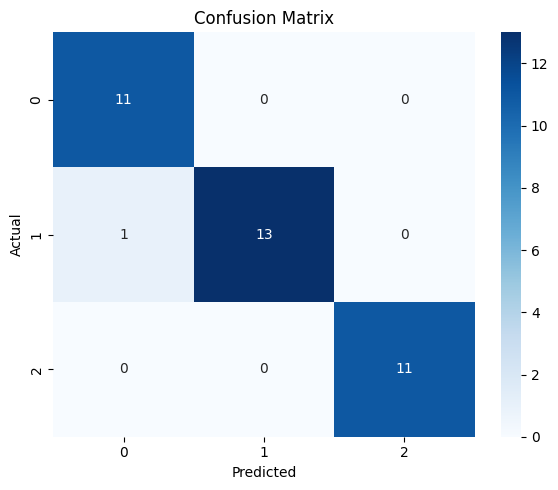

In [18]:
y_pred = best_est.predict(X_test)

macro_f1 = f1_score(Y_test, y_pred, average='macro')
acc = (y_pred == Y_test).mean()

print(f"Macro-F1 (test): {macro_f1:.4f}")
print(f"Accuracy (test): {acc:.4f}\n")

print(classification_report(Y_test, y_pred, digits=4))

pred_view = pd.DataFrame({
    "y_true": np.array(Y_test),
    "y_pred": y_pred
})
pred_view["correct"] = pred_view["y_true"] == pred_view["y_pred"]
display(pred_view.head(5))

cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()